<a href="https://colab.research.google.com/github/AmmarR58/EECS-4484-M-Lab6/blob/main/Lab6-Ammar-Rafiqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIC-MalMem-2022 Answer File

### Author: Ruba Al Omari (change this to your name in your submission)

**CIC-MalMem-2022 Original Dataset Source:  University of New Brunswick | UNB - Canadian Institute for Cybersecurity . https://www.unb.ca/cic/datasets/malmem-2022.html**


**CIC-MalMem-2022 Modified Dataset: https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv**

In [1]:
#import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import warnings

Tip: If you get future warnings you can ignore them using:

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Task 1-Exploratory Data Analysis

<span style="color: yellow;">15 Marks, 3 marks per step from step1 to step5</span>


Load the dataset using Pandas into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

### 1. Load the dataset

In [2]:
#load the dataset
url = "https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv"
malware_df = pd.read_csv(url, sep=',')

#let's create a backup copy of the dataset
malware_df_backup = malware_df.copy()

### 2. Take a quick look at the data structure


#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [3]:
# Display the first 5 rows
malware_df.head(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


#### Use describe() method to see a summary of the numerical attributes.

In [4]:
# Display a summary of the numerical attributes
malware_df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58589.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341492,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588203,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861858,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

The original dataset from UNB doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [5]:
# Display a quick description of the data
malware_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58594 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58589 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

#### Use value_counts to show what categories exist and how many rows belong to each Category and to each Class

In [6]:
# Display categories and the number of rows
malware_df['Category'].value_counts()

,count
Category,
Benign,29296
Spyware-Gator-1c227a11e3d4987630bf89b1712442a4d3e5cb551d13273811ec47c237a8b303-7.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-6.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-7.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-8.raw,2
...,...
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-3.raw,1
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-2.raw,1
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-10.raw,1


In [7]:
# Display the number of Benign and Malware values
malware_df['Class'].value_counts()

,count
Class,
Benign,29298
Malware,29298


### 3. Plot a pie of the data classes

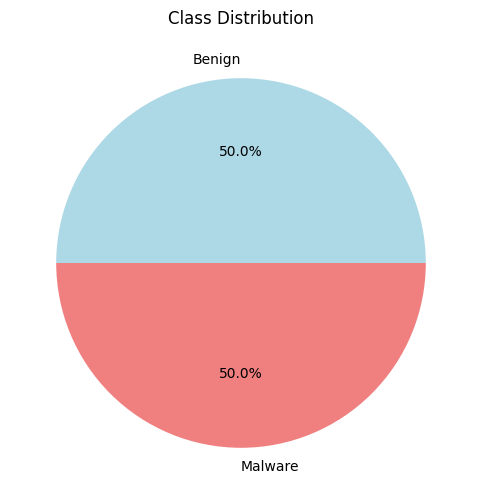

In [8]:
# Plot a pie
plt.figure(figsize=(6, 6))
malware_df['Class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

### 4. Plot a histogram of the features

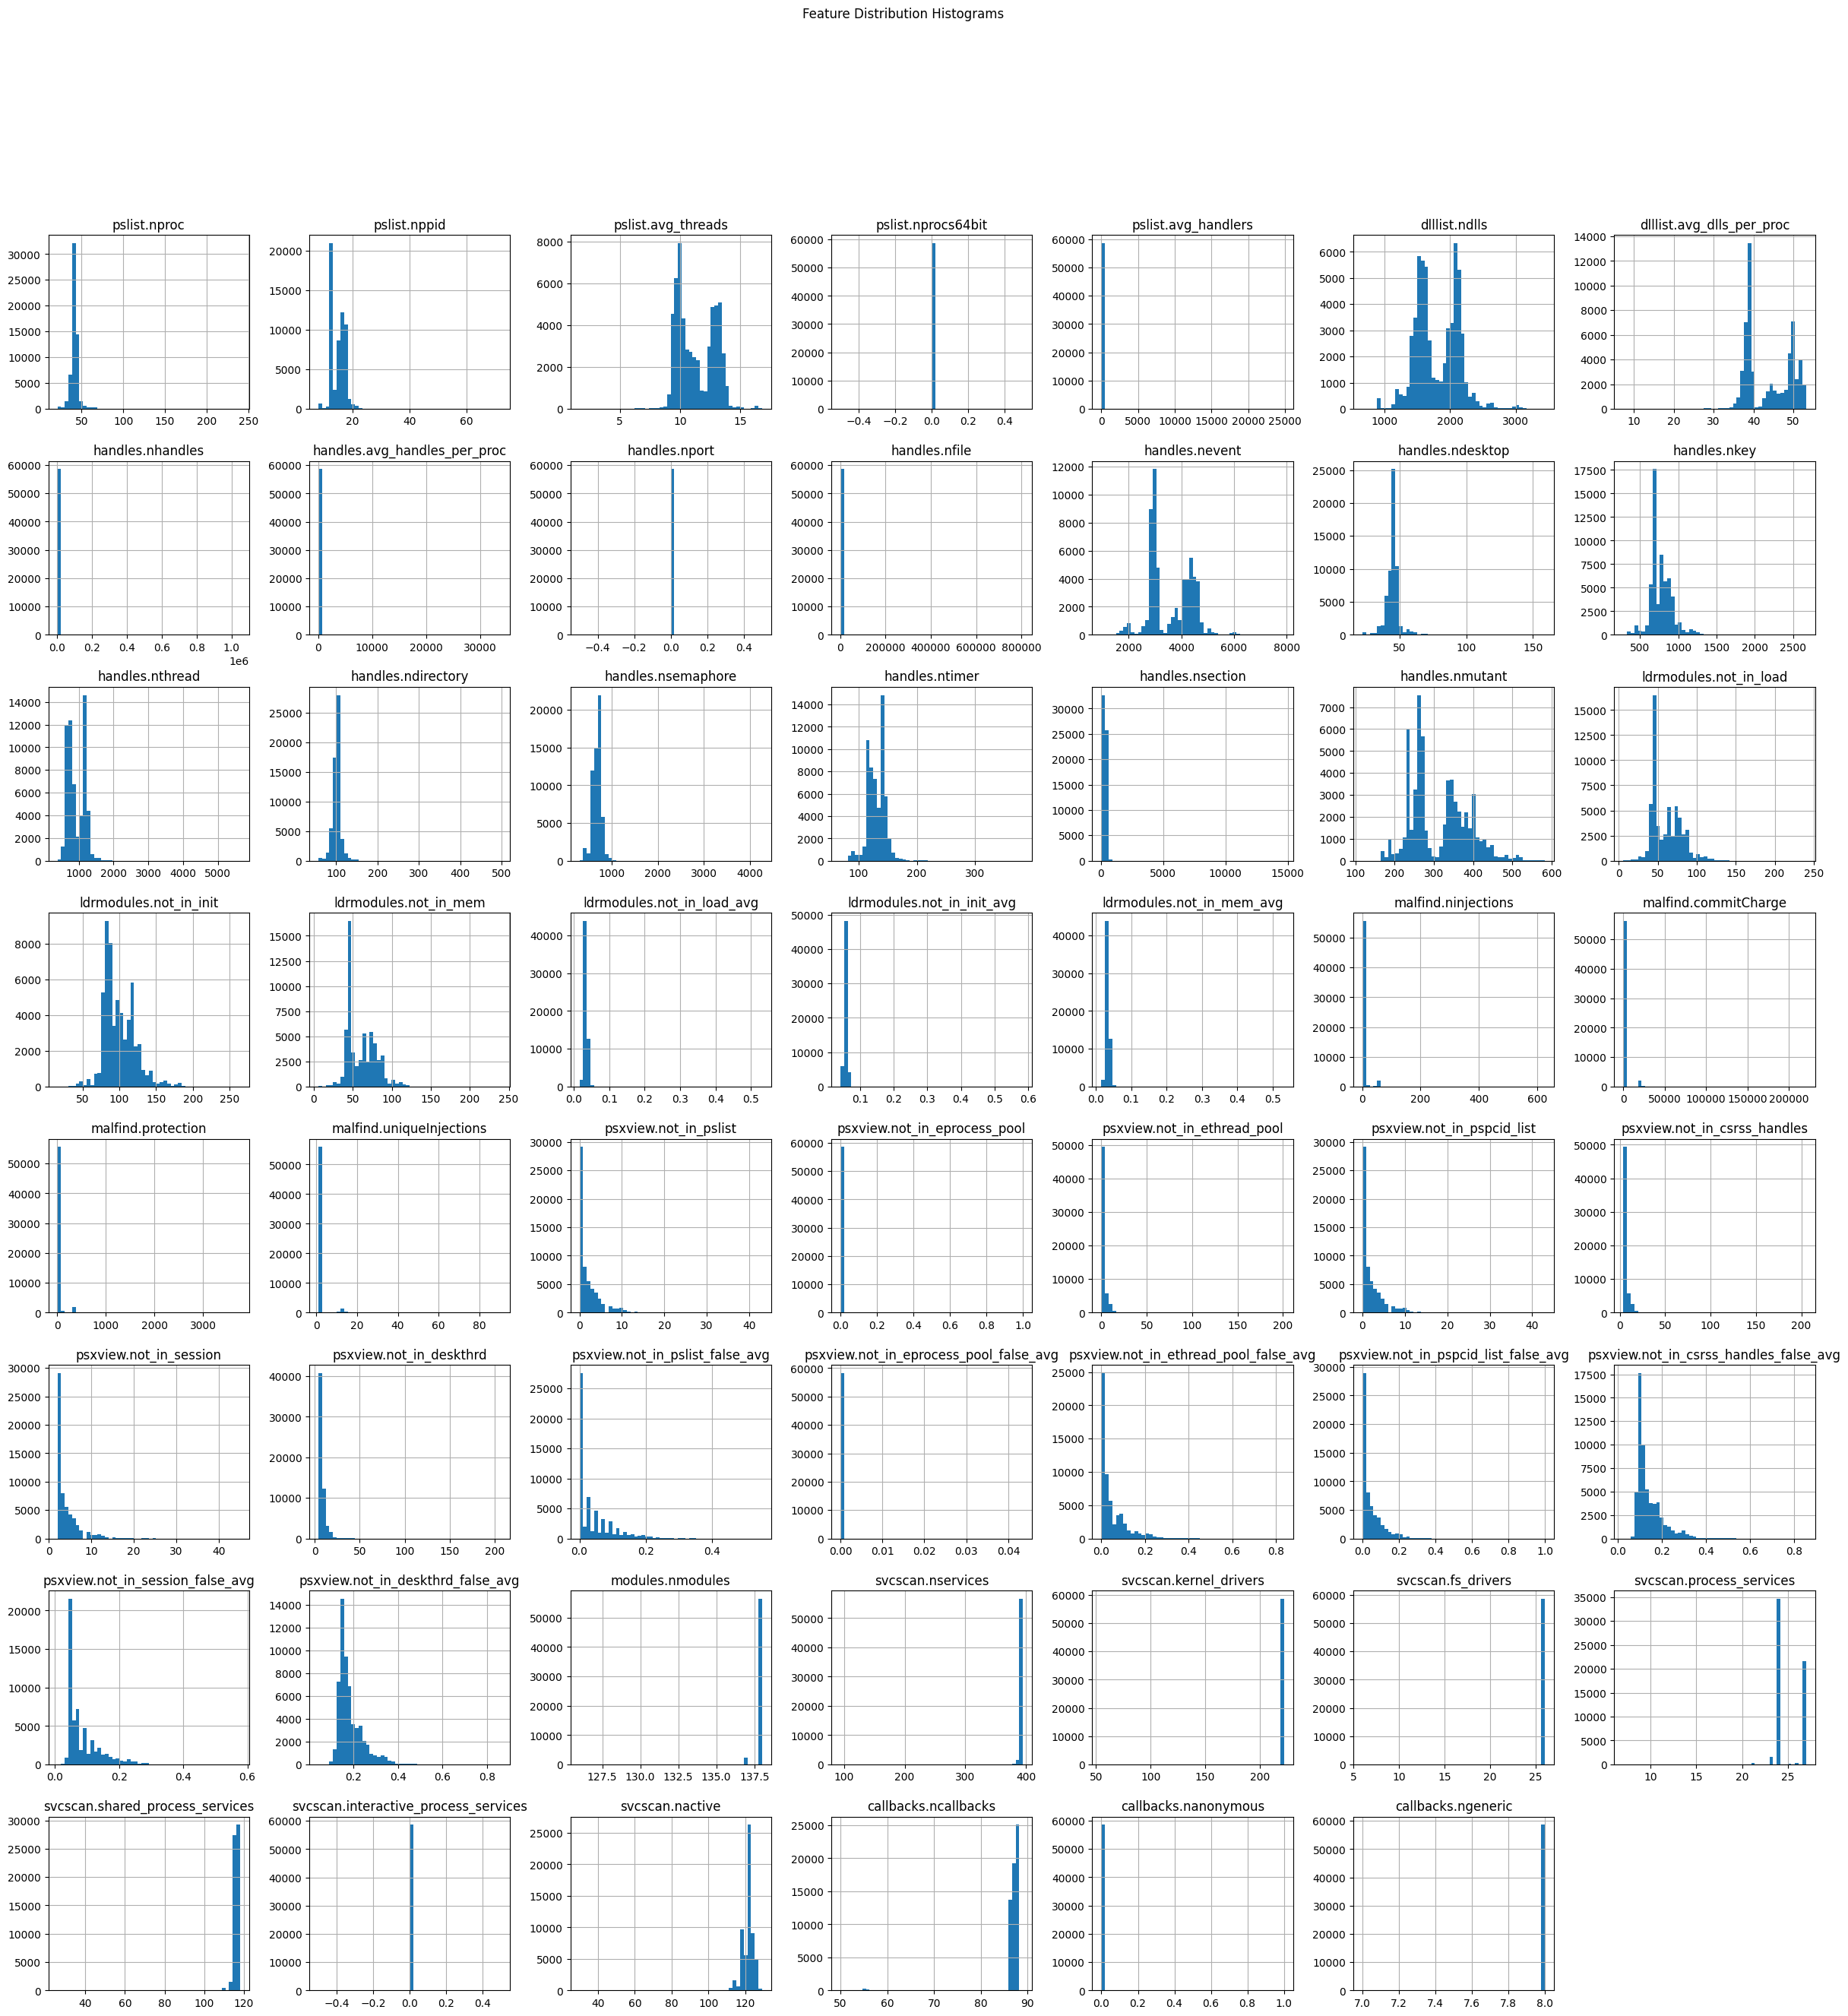

In [9]:
# Display a histogram
malware_df.hist(figsize=(30, 30), bins=50)
plt.suptitle("Feature Distribution Histograms")
plt.show()

### 5. Look for correlations using Pearson correlation coefficient.

In [10]:
# Looks for correlations
numeric_df = malware_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_matrix

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
pslist.nproc,1.000000,0.485450,-0.208977,NaN,-0.004850,0.567111,-0.006901,0.207611,0.021915,NaN,...,0.119179,0.079452,-0.003133,0.027375,0.221725,NaN,0.431282,-0.053061,-0.030426,0.008045
pslist.nppid,0.485450,1.000000,-0.726754,NaN,-0.224777,-0.094653,-0.594012,-0.093094,-0.160602,NaN,...,-0.354249,-0.111617,-0.016397,-0.652891,-0.244422,NaN,0.005160,-0.239525,-0.010932,0.002349
pslist.avg_threads,-0.208977,-0.726754,1.000000,NaN,0.332642,0.556816,0.904924,0.281213,0.242176,NaN,...,0.551201,0.225697,0.026714,0.804710,0.522766,NaN,0.347857,0.298616,-0.007509,0.009647
pslist.nprocs64bit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pslist.avg_handlers,-0.004850,-0.224777,0.332642,NaN,1.000000,0.275566,0.360883,0.971557,0.992540,NaN,...,0.239654,0.105178,0.010450,0.317883,0.250562,NaN,0.204127,0.069981,-0.010605,0.007308
dlllist.ndlls,0.567111,-0.094653,0.556816,NaN,0.275566,1.000000,0.778771,0.427131,0.211031,NaN,...,0.584471,0.299932,0.045204,0.645479,0.681809,NaN,0.752189,0.198395,-0.040057,0.026202
dlllist.avg_dlls_per_proc,-0.006901,-0.594012,0.904924,NaN,0.360883,0.778771,1.000000,0.365824,0.264175,NaN,...,0.664838,0.309271,0.049770,0.861711,0.689500,NaN,0.572227,0.307340,-0.025459,0.022666
handles.nhandles,0.207611,-0.093094,0.281213,NaN,0.971557,0.427131,0.365824,1.000000,0.967002,NaN,...,0.266710,0.128301,0.012881,0.310691,0.307211,NaN,0.321916,0.056964,-0.018165,0.009566
handles.avg_handles_per_proc,0.021915,-0.160602,0.242176,NaN,0.992540,0.211031,0.264175,0.967002,1.000000,NaN,...,0.177340,0.074514,0.002843,0.237993,0.187618,NaN,0.155814,0.037261,-0.008355,0.003216
handles.nport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 2-Prepare the Data for ML Algorithms

<span style="color: yellow;">24 Marks, 3 marks per step from step6 to step13</span>

### 6. Extract malware category and malware family from the unique identifiers.


In [11]:
# Extract the unique identifiers
malware_df[['MalwareCategory', 'MalwareFamily']] = malware_df['Category'].str.split('-', n=1, expand=True)

In [12]:
# Display columns and head
malware_df.columns
malware_df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,MalwareCategory,MalwareFamily
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,Benign,None
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,Benign,None
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,Benign,None
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,Benign,None
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,Benign,None


### 7. Check for duplicate rows, and remove them if any.

In [13]:
# Check and remove duplicate rows
malware_df.duplicated().sum()

np.int64(534)

### 8. Handle the missing values
we will handle the missing values in the preprocessing pipeline, but for now let's have a look to see if we have missing values.

In [14]:
# Find missing values
malware_df.isna().sum()

,0
Category,2
pslist.nproc,0
pslist.nppid,0
pslist.avg_threads,7
pslist.nprocs64bit,0
pslist.avg_handlers,0
dlllist.ndlls,0
dlllist.avg_dlls_per_proc,0
handles.nhandles,0
handles.avg_handles_per_proc,0


For the missing values, we will fill the mean if it is a numerical column and the most frequent if it is a categorical column.

We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 9. Drop Category, pslist.nprocs64bit, handles.nport, and svcscan.interactive_process_services features

**Note** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [15]:
# Drop columns
malware_df.drop(columns=['Category', 'pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services'], inplace=True)

### 10. Create and apply a preprocessing pipeline:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler.

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

In [16]:
# Create the pipleline
num_features = malware_df.select_dtypes(include=['int64', 'float64']).columns
cat_features = malware_df.select_dtypes(include=['object']).columns

# Numerical pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Categorical pipeline
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)],
    remainder='passthrough'
)

In [17]:
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Apply the pipeline
malware_df_prepared = preprocessor.fit_transform(malware_df)

# Add back the column headers
feature_names=preprocessor.get_feature_names_out()
malware_df_prepared = pd.DataFrame(data=malware_df_prepared, columns=feature_names)

# Display the table
malware_df_prepared

,num__pslist.nproc,num__pslist.nppid,num__pslist.avg_threads,num__pslist.avg_handlers,num__dlllist.ndlls,num__dlllist.avg_dlls_per_proc,num__handles.nhandles,num__handles.avg_handles_per_proc,num__handles.nfile,num__handles.nevent,...,num__svcscan.fs_drivers,num__svcscan.process_services,num__svcscan.shared_process_services,num__svcscan.nactive,num__callbacks.ncallbacks,num__callbacks.nanonymous,num__callbacks.ngeneric,cat__Class,cat__MalwareCategory,cat__MalwareFamily
0,0.624044,0.860519,-0.494893,-0.399308,-0.354192,-0.906971,-0.232099,-0.255199,-0.066754,-0.51078,...,0.021983,-0.695219,-0.567286,-0.352676,0.030102,-0.029224,0.010931,Benign,Benign,None
1,0.970233,1.613326,0.119907,-0.047165,0.798092,0.07312,0.231448,-0.050185,-0.017224,0.234141,...,0.021983,-0.695219,0.722713,0.001578,0.030102,-0.029224,0.010931,Benign,Benign,None
2,-0.241427,-0.268691,2.130546,0.363994,0.367501,0.799759,0.261036,0.264825,0.043959,0.525902,...,0.021983,1.266059,0.722713,-0.70693,0.349173,-0.029224,0.010931,Benign,Benign,None
3,-1.626181,-0.645094,1.359181,0.149937,-1.109241,0.252255,-0.370177,0.100825,-0.078407,-0.759088,...,0.021983,1.266059,0.722713,-0.70693,0.349173,-0.029224,0.010931,Benign,Benign,None
4,0.104762,0.484116,0.069825,0.302382,0.776865,0.958987,0.320007,0.217621,0.002587,0.324774,...,0.021983,-0.695219,0.722713,0.710086,0.030102,-0.029224,0.010931,Benign,Benign,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,-0.76071,0.107713,-0.776644,-0.286289,-1.084983,-0.772824,-0.469626,-0.233389,-0.078407,-0.935386,...,0.021983,-0.695219,-0.567286,-0.70693,-0.28897,-0.029224,0.010931,Malware,Ransomware,Shade-fa03be3078d1b9840f06745f160eb3660824fc63...
58592,-0.76071,-0.268691,-0.878755,-0.512205,-1.406409,-1.271758,-0.661743,-0.406475,-0.086274,-1.463039,...,0.021983,-0.695219,-0.567286,-2.123946,0.349173,-0.029224,0.010931,Malware,Ransomware,Shade-f56687137caf9a67678cde91e46143a458cd7316...
58593,-0.587615,0.107713,-0.944142,-0.335102,-1.100144,-0.975717,-0.467776,-0.231723,-0.080156,-0.93911,...,0.021983,-0.695219,-0.567286,-0.70693,0.349173,-0.029224,0.010931,Malware,Ransomware,Shade-faddeea111a25da4d0888f3044ae9555f0c55517...
58594,-0.76071,0.107713,-0.691551,-0.286047,-1.088015,-0.777531,-0.46942,-0.233204,-0.077825,-0.935386,...,0.021983,-0.695219,-0.567286,-0.70693,0.030102,-0.029224,0.010931,Malware,Ransomware,Shade-f866c086af2e1d8ebaa6f2c86315788967682851...


### 11. Display your pipeline

In [18]:
# Display the pipeline
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles....
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['Class', 'MalwareCategory', 'MalwareFamily'], dtype='object'))])

### 12. Print your dataframe .shape()

In [19]:
# Print the dataframe shape
malware_df_prepared.shape

(58596, 55)

### 13. Make a backup copy of your dataframe

In [20]:
# A backup copy of the dataframe
malware_df_prepared_backup = malware_df_prepared.copy()

# Task 3-Select a Model and Train it to Predict Class
<span style="color: yellow;">12 Marks, 3 marks per step from step14 to step17</span>

<span style="color: yellow;">5 Marks for step18</span>

### 14. Drop the MalwareFamily and MalwareCategory features, and use Class as your target.

In [21]:
# Drop unnecessary features and set target
X = malware_df_prepared.drop(columns=['cat__MalwareFamily', 'cat__MalwareCategory', 'cat__Class'], axis=1) # Features
y = malware_df_prepared['cat__Class']  # Target

### 15. Split the dataset into a training dataset (80%) and testing dataset.

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(46876, 52) (46876,) (11720, 52) (11720,)


### 16. Train a svm classifier (svc) to predict the class of the file, whether it is Benign or Malware on the training set using: kernel = rbf, gamma = 1, and C =1.

In [23]:
# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, gamma=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, gamma=1)

### 17. Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [24]:
# Test the model and report classification results
y_pred = svm_classifier.predict(X_test)
print(f'Classification Report for C = 1')
print(classification_report(y_test, y_pred))

Classification Report for C = 1
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5790
     Malware       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



### 18. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

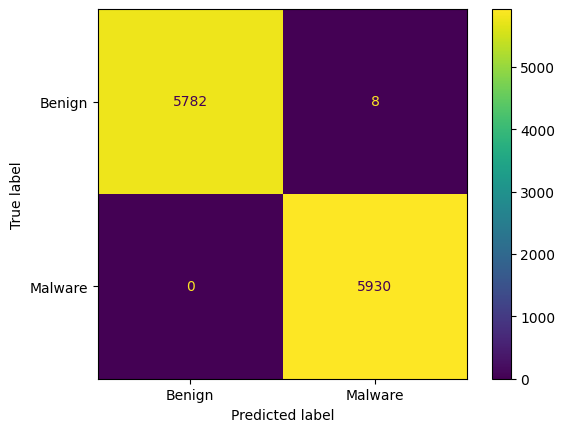

In [25]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Task 4-Hyperparameters Fine Tuning

<span style="color: yellow;">9 Marks, 3 marks per step from step19 to step21</span>


### 19. Use GridSearchCV to find the best value of C: [0.1, 1, 10], and print out the grid_search.best_params_

In [26]:
# Define the parameter grid for C
param_grid = {'kernel': ['rbf'],
                  'C': [0.1, 1 , 10]#,
                  #'gamma': [0.1, 1, 10]
                }
# Save the SVC value
estimator = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

### 20. Train 2 other classifiers of your choice, one of which is a neural network.

classification_report for Random Forest
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5790
     Malware       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



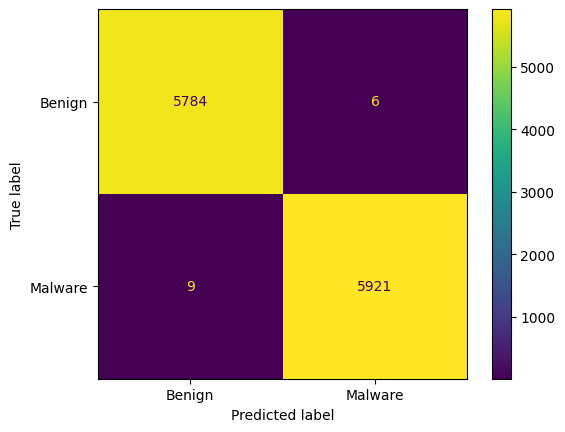

In [27]:
# Train Random Forest Classifier
model_rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42)
# Train the model
model_rf.fit(X_train, y_train)
# Test the model and generate classification report
y_predict_rf = model_rf.predict(X_test)
print(f'classification_report for Random Forest')
print (classification_report(y_test, y_predict_rf))
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf)

classification_report for MLP
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5790
     Malware       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



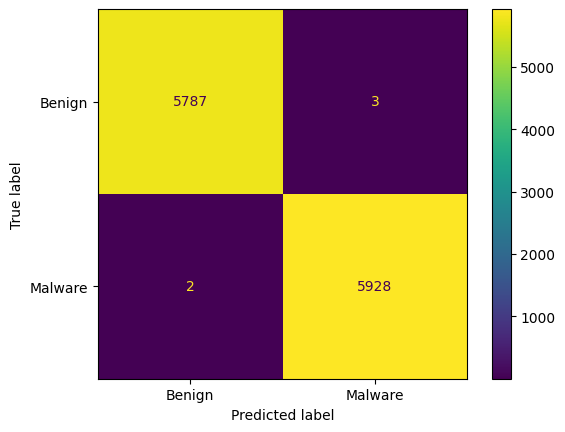

In [28]:
# Train MLP Classifier (Neural Network)
model_mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    alpha=0.01,
    max_iter=300,
    random_state=42)
# Train the model
model_mlp.fit(X_train, y_train)
# Test the model and generate classification report
y_predict_mlp = model_mlp.predict(X_test)
print(f'classification_report for MLP')
print (classification_report(y_test, y_predict_mlp))
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_mlp)

### 21. Compare the results of the three classifiers in a table. Include Accuracy, F1-Score, Precision and Recall.

The table below is showing the first row only, your table should should show three rows, one for each classifier

| Classifier | Precision | Recall | Accuracy | F1-Score |
|------------|-----------|--------|----------|----------|
|   SVM      |  1.00  | 1.00 | 1.00  | 1.00  |
|Random Forest  | 1.00 | 1.00 | 1.00  | 1.00 |
|   MLP  |  1.00  | 1.00 | 1.00 | 1.00  |

# Task 5-Predict Malware Category

<span style="color: yellow;">10 Marks for step 23</span>

### 22.	Revert back to the malware_df_prepared_backup dataset you saved in step 13.

In [29]:
# Revert to the backup dataset
malware_df = malware_df_prepared_backup.copy()

### 23.	Repeat Task 3, but this time drop Class and MalwareFamily, and use MalwareCategory as your target.
Do it all (steps 14 to 18) in a single code cell below

(46876, 52) (46876,) (11720, 52) (11720,)
Classification Report for C = 1
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5790
  Ransomware       0.59      0.57      0.58      1951
     Spyware       0.65      0.61      0.63      2030
      Trojan       0.59      0.64      0.62      1949

    accuracy                           0.80     11720
   macro avg       0.71      0.71      0.71     11720
weighted avg       0.80      0.80      0.80     11720



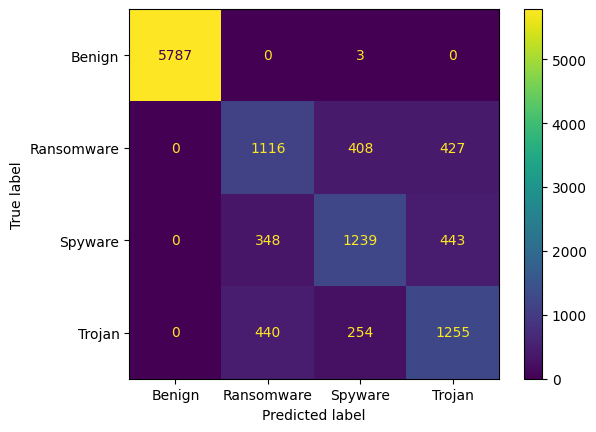

In [30]:
# Step 14: Drop unnecessary features and set target
X = malware_df.drop(columns=['cat__Class', 'cat__MalwareFamily', 'cat__MalwareCategory'], axis=1) # Features
y = malware_df['cat__MalwareCategory']  # Target
# Step 15: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Step 16: Train an SVM classifier
svm_classifier = SVC(kernel='rbf', gamma=1, C=1, random_state=42)
svm_classifier.fit(X_train, y_train)
# Step 17: Test the model and generate classification report
y_pred = svm_classifier.predict(X_test)
print(f'Classification Report for C = 1')
print(classification_report(y_test, y_pred))
# Step 18: Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Task 6-Predict Malware Family

<span style="color: yellow;">10 Marks for step 25</span>

### 24.	Revert back to the malware_df_prepared_backup dataset you saved in step 13.

In [31]:
# Revert to the backup dataset
malware_df = malware_df_prepared_backup.copy()

### 25.	Repeat Task 3, but this time drop Class and MalwareCategory, and use MalwareFamily as your target.
Do it all (steps 14 to 18) in a single code cell below

(23438, 52) (23438,) (5860, 52) (5860,)
Classification Report for C = 1
              precision    recall  f1-score   support

180solutions       0.24      0.18      0.20       414
         Ako       0.27      0.23      0.25       383
         CWS       0.28      0.19      0.22       424
       Conti       0.25      0.26      0.25       360
      Emotet       0.31      0.37      0.33       385
       Gator       0.47      0.50      0.48       445
        Maze       0.43      0.27      0.33       397
        Pysa       0.40      0.13      0.20       337
     Reconyc       0.36      0.25      0.30       308
     Refroso       0.36      0.58      0.45       397
        Scar       0.35      0.35      0.35       416
       Shade       0.33      0.35      0.34       404
        TIBS       0.79      0.47      0.59       319
 Transponder       0.24      0.41      0.30       476
        Zeus       0.25      0.37      0.30       395

    accuracy                           0.33      5860
   macro

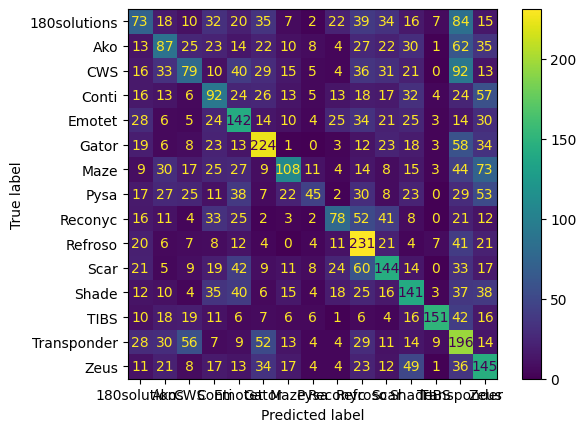

In [32]:
# Step 14: Drop unnecessary features and set target
# Extract only the family name
malware_df['family_name'] = malware_df['cat__MalwareFamily'].str.split('-').str[0]
# Drop rows where family_name is NA (benign samples) and select features
malware_df = malware_df[malware_df['family_name'].notna()]
X = malware_df.drop(['cat__Class', 'cat__MalwareCategory', 'cat__MalwareFamily', 'family_name'], axis=1)
y = malware_df['family_name']  # Use simplified family names
# Step 15: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Step 16: Train an SVM classifier
svm_classifier = SVC(kernel='rbf', gamma=1, C=1, random_state=42)
svm_classifier.fit(X_train, y_train)
# Step 17: Test the model and generate classification report
y_pred = svm_classifier.predict(X_test)
print(f'Classification Report for C = 1')
print(classification_report(y_test, y_pred))
# Step 18: Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### 26.	Why do you think the accuracy is this low in this task?
<span style="color: yellow;">5 Marks for step 26</span>

The accuracy might be low due to the high number of malware families, leading to class imbalance and data sparsity. Some malware families have fewer samples, that might make it harder for the model to learn effectively. The features in the dataset may not be sufficiently discriminative for distinguishing between malware families.

Code Quality and Style
- Code is clearly formatted and adheres to PEP 8 (or your chosen style guide).
- Variables and functions are named descriptively.
- The code includes clear comments explaining the purpose of code blocks and non-obvious logic.
- Code is structured into modular functions where appropriate.
- Unnecessary or redundant code is avoided.

<span style="color: yellow;">10 Marks for code quality and style</span>
